# hist
Example histograms with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import DATADIR, ErgastF1
from viz import Plot

In [3]:
f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

## How old was each driver on each podium?

In [4]:
pods = (

    # Get podium finishes, driver names, and driver birthdays.
    f1.results
    .loc[lambda x: x['order'] <= 3]
    .join(f1.drivers['driver birthday'.split()], on='id_driver')
    .join(f1.races['date'], on='id_race')
    ['date order driver birthday'.split()]
    
    # Calculate age of each driver during each race.
    .assign(age = lambda df: df['date'] - df['birthday'])
    .assign(age = lambda df: df['age'].dt.days / 365.25)
    
    # If co-drivers share a result, then keep the older one.    
    .sort_values('date order age'.split())
    .drop_duplicates('date order'.split(), keep='last')
    .reset_index(drop=True)    
)
pods

,date,order,driver,birthday,age
0,1950-05-13,1,Nino Farina,1906-10-30,43.534565
1,1950-05-13,2,Luigi Fagioli,1898-06-09,51.923340
2,1950-05-13,3,Reg Parnell,1911-07-02,38.863792
3,1950-05-21,1,Juan Fangio,1911-06-24,38.907598
4,1950-05-21,2,Alberto Ascari,1918-07-13,31.854894
...,...,...,...,...,...
3049,2019-11-17,2,Pierre Gasly,1996-02-07,23.775496
3050,2019-11-17,3,Carlos Sainz,1994-09-01,25.210130
3051,2019-12-01,1,Lewis Hamilton,1985-01-07,34.896646
3052,2019-12-01,2,Max Verstappen,1997-09-30,22.168378


## golden years

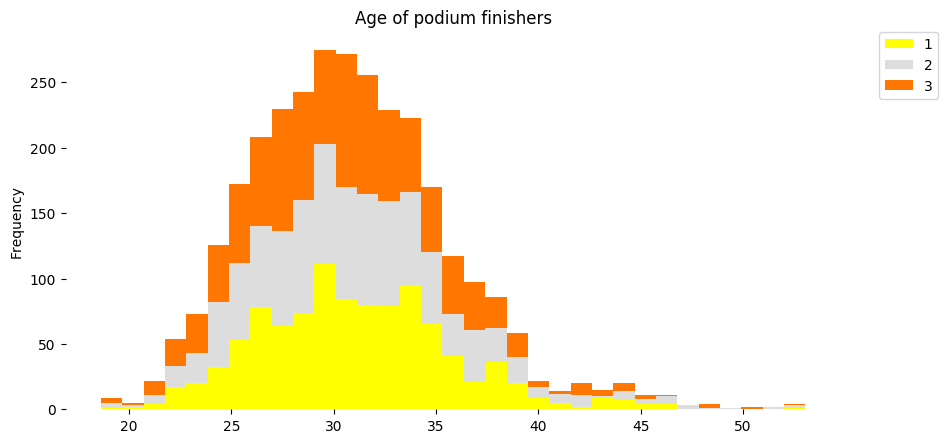

In [5]:
kw = dict()
kw['color'] = ['#ffff00', '#dddddd', '#ff7700']
kw['title'] = f"Age of podium finishers"
data = pods.pivot(index='date', columns='order', values='age')
axes = plot.hist(data, **kw)

## all-ages shows

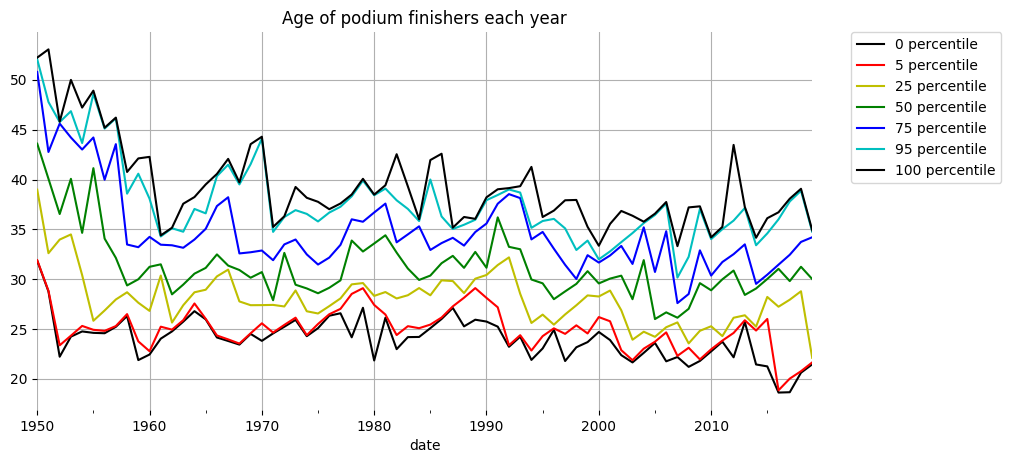

In [6]:
kw = dict()
kw['title'] = 'Age of podium finishers each year'
data = pods.set_index('date')['age']
axes = plot.quant(data, 'y', **kw)

## good old boys

In [7]:
olds = pods.loc[pods.groupby('driver')['age'].idxmax()]
olds.nlargest(10, 'age').reset_index(drop=True)

,date,order,driver,birthday,age
0,1951-07-01,1,Luigi Fagioli,1898-06-09,53.056810
1,1950-05-21,3,Louis Chiron,1899-08-03,50.795346
2,1953-06-07,3,Felice Bonetto,1903-06-09,49.995893
3,1955-09-11,2,Piero Taruffi,1906-10-12,48.914442
4,1955-06-05,3,Nino Farina,1906-10-30,48.596851
5,1957-09-08,2,Juan Fangio,1911-06-24,46.209446
6,1955-07-16,3,Karl Kling,1910-09-16,44.829569
7,1950-06-18,3,Louis Rosier,1905-11-05,44.616016
8,1953-09-13,3,Luigi Villoresi,1909-05-16,44.328542
9,1970-07-18,2,Jack Brabham,1926-04-02,44.292950


## the young and the restless

In [8]:
utes = pods.loc[pods.groupby('driver')['age'].idxmin()]
utes.nsmallest(10, 'age').reset_index(drop=True)

,date,order,driver,birthday,age
0,2016-05-15,1,Max Verstappen,1997-09-30,18.622861
1,2017-06-25,3,Lance Stroll,1998-10-29,18.655715
2,2008-09-14,1,Sebastian Vettel,1987-07-03,21.201916
3,2015-07-26,2,Daniil Kvyat,1994-04-26,21.248460
4,2014-03-16,2,Kevin Magnussen,1992-10-05,21.442847
5,2019-03-31,3,Charles Leclerc,1997-10-16,21.453799
6,2003-03-23,3,Fernando Alonso,1981-07-29,21.648186
7,2006-09-10,3,Robert Kubica,1984-12-07,21.757700
8,1997-04-13,3,Ralf Schumacher,1975-06-30,21.787817
9,1980-01-27,2,Elio de Angelis,1958-03-26,21.839836


## over the Hills

In [9]:
hills = pods.loc[pods['driver'].str.endswith('Hill')]
hills.groupby('driver order'.split())['age'].max().unstack()

order,1,2,3
driver,,,
Damon Hill,37.949350,36.895277,35.093771
Graham Hill,40.251882,40.038330,37.412731
Phil Hill,34.392882,35.121150,35.159480
